In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
from sklearn.datasets import load_iris

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [45]:
from sklearn.model_selection import train_test_split

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import multilabel_confusion_matrix

In [4]:
iris = load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [8]:
df= pd.DataFrame(iris.data,columns=iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df['target'] = iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df0 = df[:100]

In [26]:
df0.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1
99,5.7,2.8,4.1,1.3,1


C:\Users\APU\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


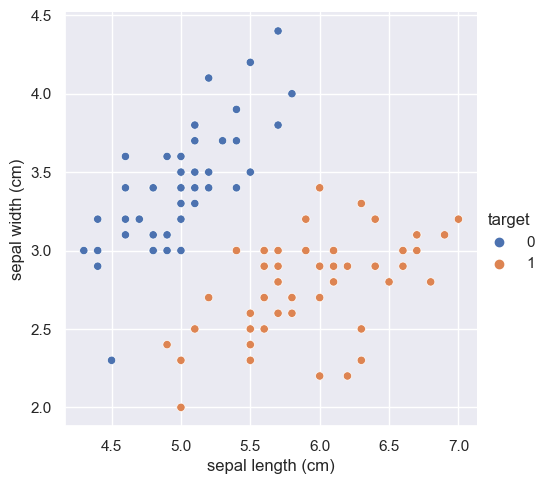

In [27]:
sns.set(rc = {'figure.figsize':(11.7,5)})
sns.relplot(data=df0,x = 'sepal length (cm)',y ='sepal width (cm)',kind='scatter',hue='target')
plt.show()


**As it looks from Graph that we can apply KNN.**

In [43]:
cross_val_score(KNeighborsClassifier(n_neighbors=10),iris.data,iris.target,cv=5)

array([0.96666667, 1.        , 1.        , 0.93333333, 1.        ])

In [49]:
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2)

In [50]:
model = KNeighborsClassifier(n_neighbors=10)

In [51]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
model.score(x_test,y_test)

0.9666666666666667

In [53]:
y_predicted = model.predict(x_test)

In [57]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[12,  0,  0],
       [ 0,  5,  1],
       [ 0,  0, 12]], dtype=int64)

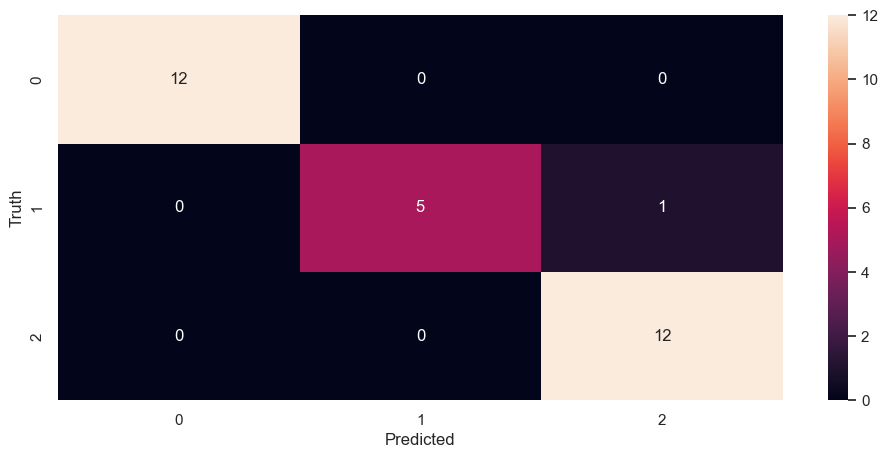

In [58]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [62]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.83      0.91         6
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [68]:
cm_class = multilabel_confusion_matrix(y_test,y_predicted)
cm_class

array([[[18,  0],
        [ 0, 12]],

       [[24,  0],
        [ 1,  5]],

       [[17,  1],
        [ 0, 12]]], dtype=int64)